# **종합실습1 이변량분석(y-숫자) : car seat 매출 분석**

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## **1.환경준비**

### **(1) 라이브러리 로딩**

In [147]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### **(2) 데이터 로딩**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [150]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [151]:
target = 'Sales'

## **2.숫자형 X --> Y**

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

In [154]:
def eda_2_nn(data, x, y):
    result = spst.pearsonr(data[x] , data[y])
    print(f'r : {result[0]}')
    print(f'pv : {result[1]}')
    sns.scatterplot(x = x, y = y, data = data)
    plt.grid()
    plt.show()

### **(1) Advertising -> Sales**

1) 시각화 : scatter(regplot), jointplot

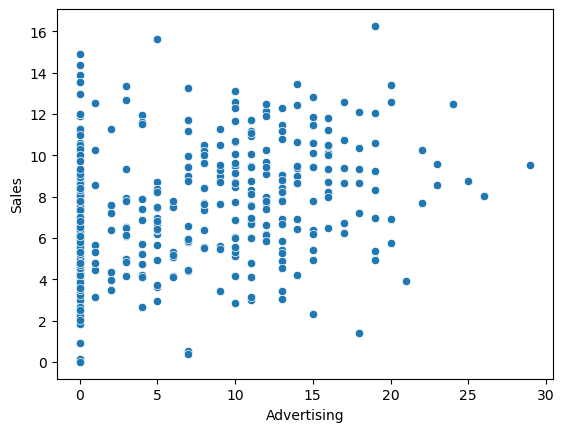

In [157]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

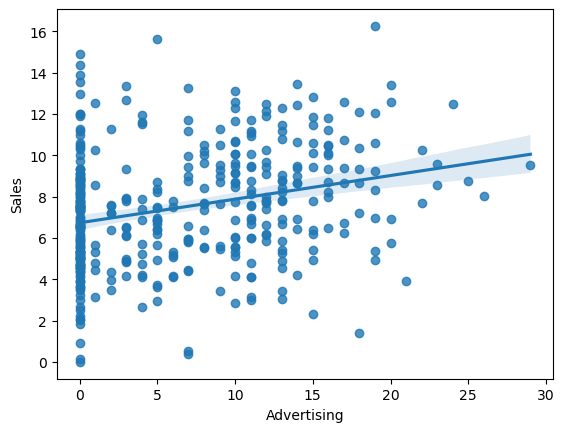

In [158]:
sns.regplot(x=var, y = target, data = data)
plt.show()

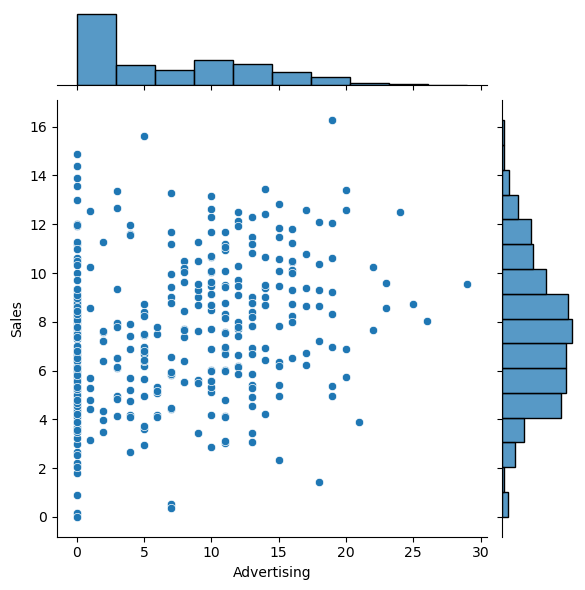

In [159]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

r : 0.269506781376902
pv : 4.3776771103027514e-08


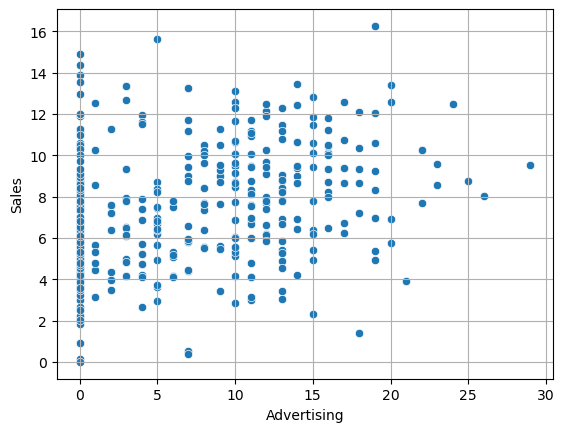

In [160]:
var= 'Advertising'

eda_2_nn(data, var, target)

2) 수치화 : 상관분석

In [162]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.3776771103027514e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고비와 판매량은 관련이 있다. 그러나 크지 않다.

* 추가 : 광고비 0 빼고 분석해보기

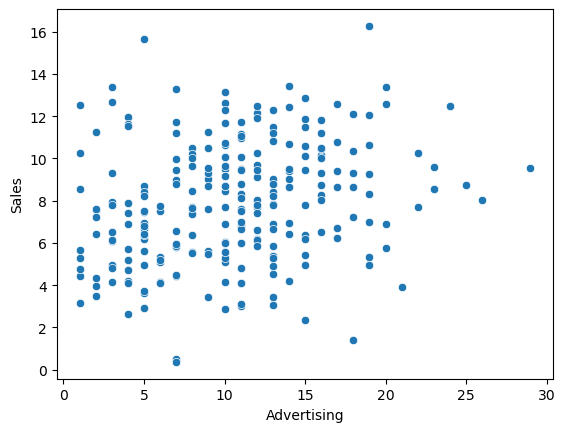

In [166]:
temp = data.loc[data['Advertising'] > 0]
sns.scatterplot(x=var, y = target, data = temp)
plt.show()

In [167]:
result = spst.pearsonr(temp[var], temp[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2571829256169392, p-value : 3.112672883086058e-05


### **(2) Population -> Sales**

1) 시각화 : scatter(regplot), jointplot

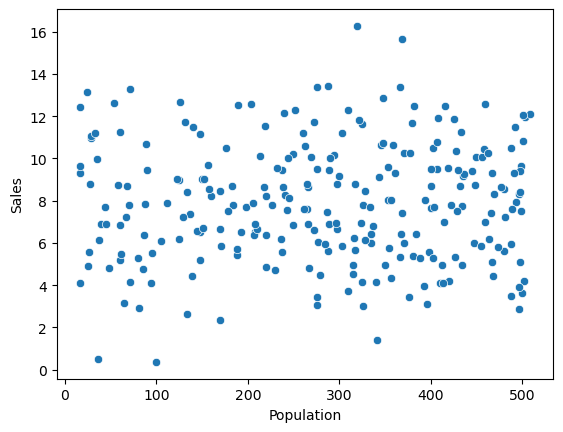

In [170]:
sns.scatterplot(x='Population',y='Sales',data=temp)
plt.show()

r : -0.2318154396045765
pv : 2.7889498393714038e-06


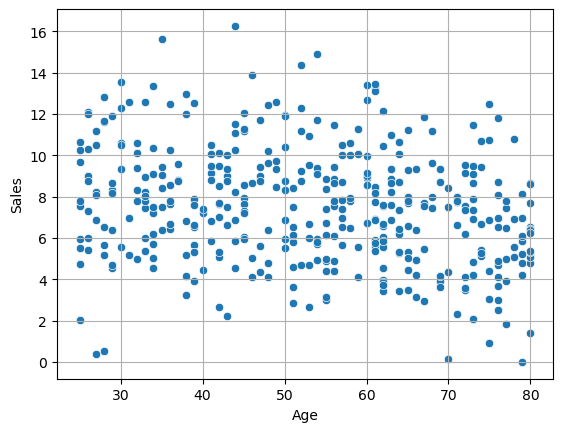

In [171]:
var= 'Age'
eda_2_nn(data, var, target)

2) 수치화 : 상관분석

In [173]:
result = spst.pearsonr(data['Population'], data['Sales'])

print(result[0])
print(result[1])

0.0504709844720392
0.31398160931904856


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [175]:
# 인구수와 판매량은 관련이 없다. 

### **(3) Price -> Sales**

1) 시각화 : scatter(regplot), jointplot

r : -0.4449507278465726
pv : 7.618187011913169e-21


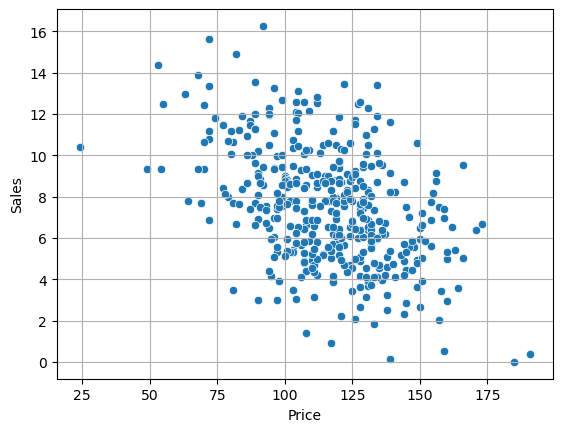

In [178]:
var= 'Price'
eda_2_nn(data, var, target)

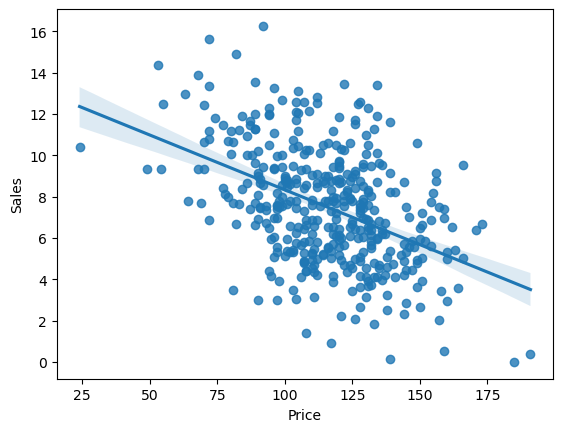

In [179]:
sns.regplot(x=var, y = target, data = data)
plt.show()

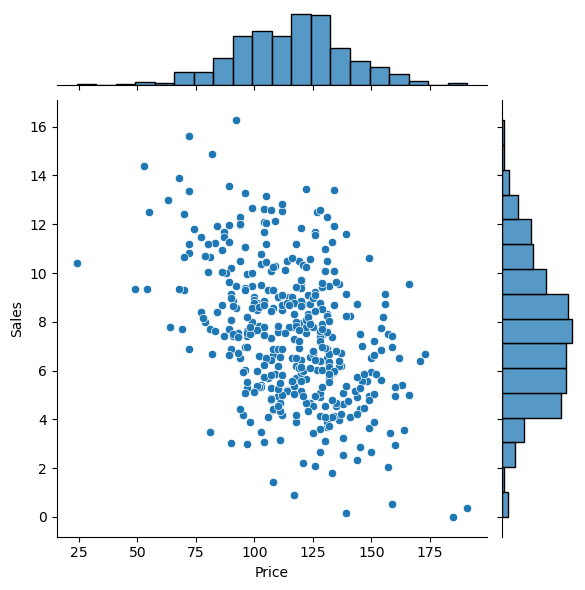

In [180]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [182]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.4449507278465726, p-value : 7.618187011913169e-21


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [184]:
# 자사 가갹과 판매량은 조금 관련이 있다.

### **(4) Age -> Sales**

1) 시각화 : scatter(regplot), jointplot

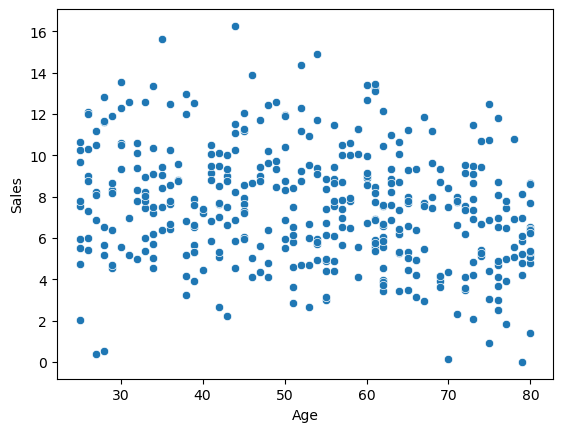

In [187]:
var = 'Age'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

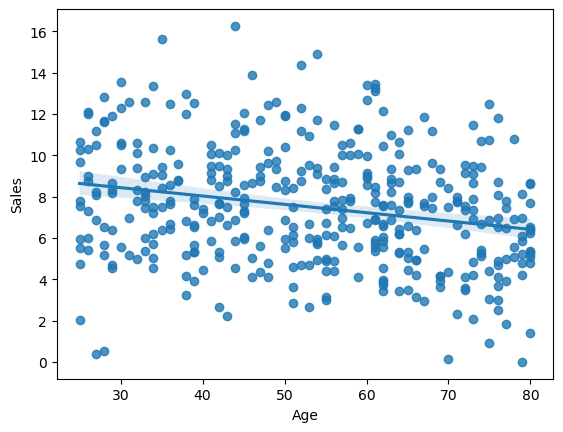

In [188]:
sns.regplot(x=var, y = target, data = data)
plt.show()

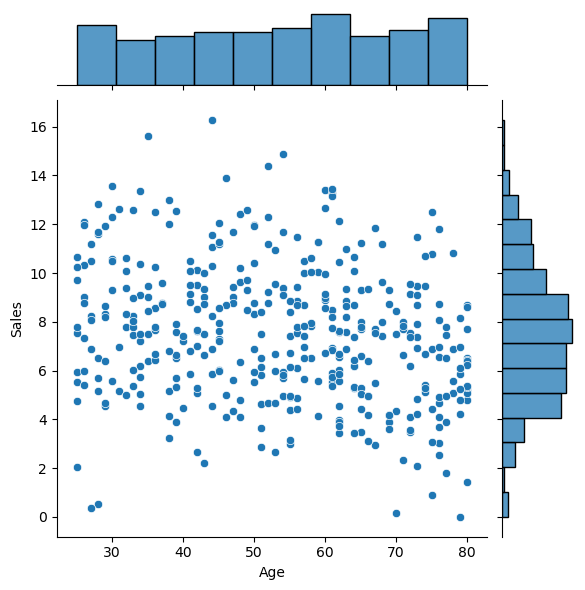

In [189]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [191]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.2318154396045765, p-value : 2.7889498393714038e-06


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [193]:
# 지역주민의 평균 나이와 판매량은 조금 관련이 있디.

### **(5) CompPrice -> Sales**

1) 시각화 : scatter(regplot), jointplot

r : 0.06407872955062152
pv : 0.2009398289418404


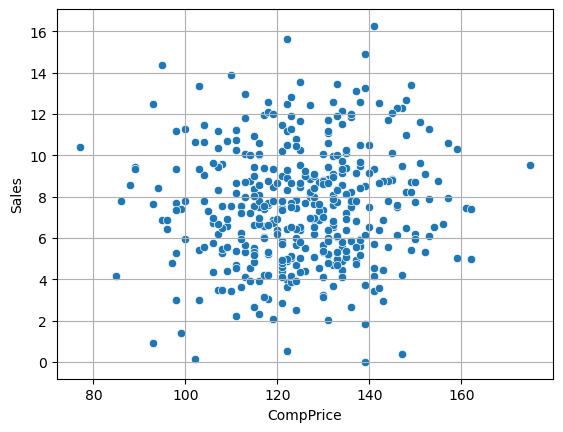

In [196]:
var= 'CompPrice'
eda_2_nn(data, var, target)

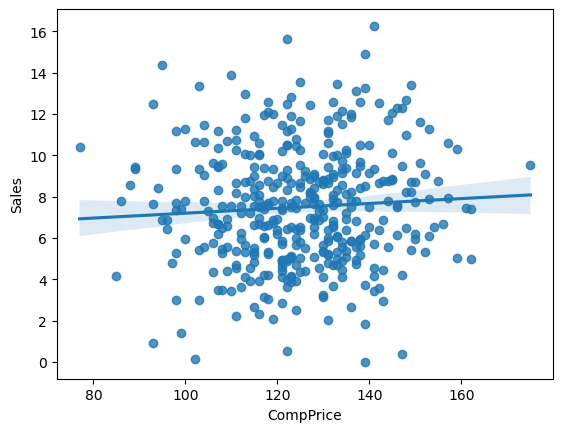

In [197]:
sns.regplot(x=var, y = target, data = data)
plt.show()

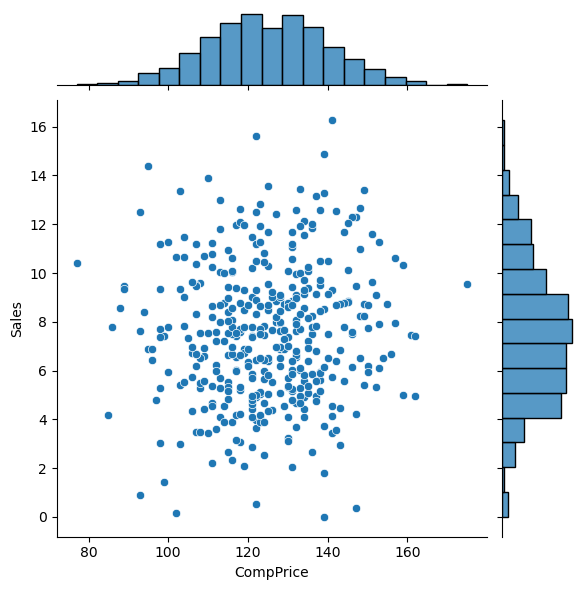

In [198]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [200]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.06407872955062152, p-value : 0.2009398289418404


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

지역별 경쟁사 판매 가격과 판매량은 무관하다

r : 0.5979217124533921
pv : 3.877120641788767e-40


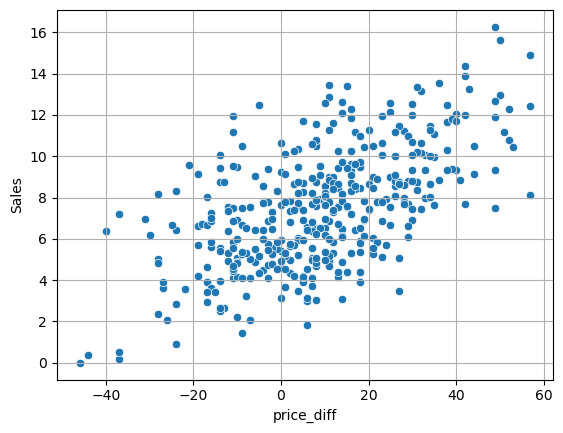

In [203]:
#가격 차이 = 가격 경쟁력

data['price_diff'] = data['CompPrice'] - data['Price']

data.head()



var = 'price_diff'


eda_2_nn(data,var,target)

### **(6) Income -> Sales**

1) 시각화 : scatter(regplot), jointplot

r : 0.15195097946754424
pv : 0.0023096704539517904


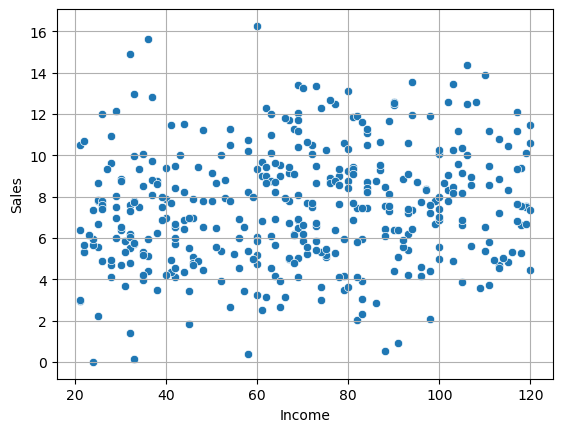

In [206]:
var= 'Income'
eda_2_nn(data, var, target)

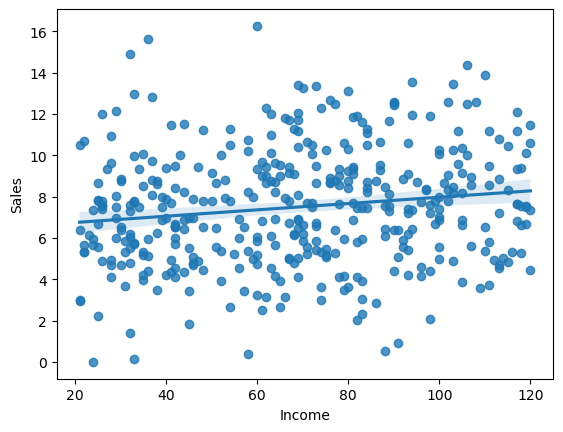

In [207]:
sns.regplot(x=var, y = target, data = data)
plt.show()

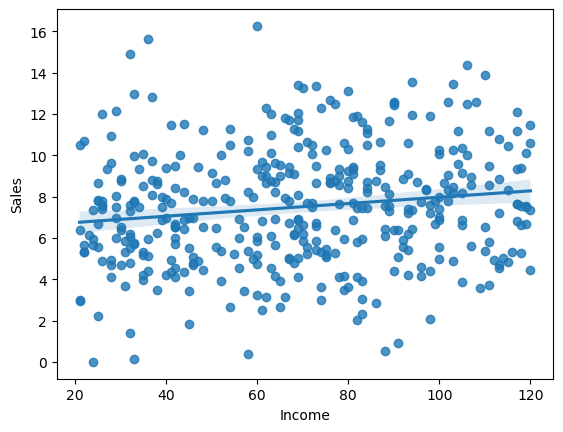

In [208]:
sns.regplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [210]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.15195097946754424, p-value : 0.0023096704539517904


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

지역 주민평균 소득과 판매량은 큰 관계까 없

## **3.범주형 X --> Y**

* 모든 범주형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### **(1) ShelveLoc-> Sales**

1) 시각화 : 평균비교 barplot

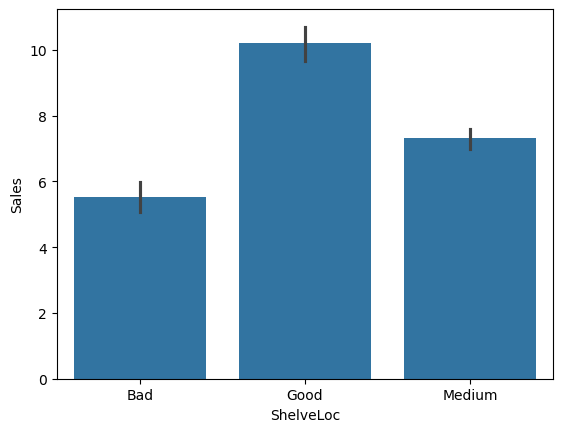

In [217]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [219]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

진열상태와 판매량은 조금 관계가 있다.  

### **(2) Urban -> Sales**

1) 시각화 : 평균비교 barplot

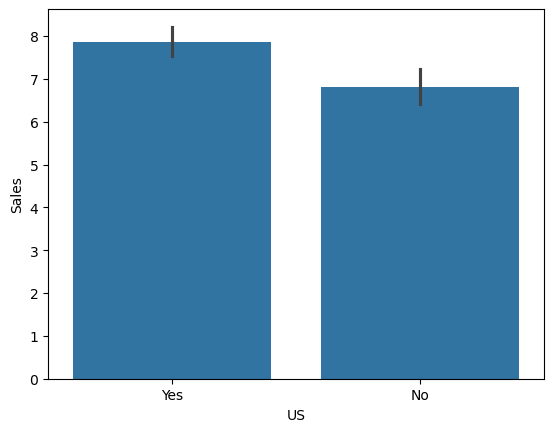

In [224]:
var = 'US'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [226]:
d_y = data.loc[data[var]=='Yes', target]
d_n = data.loc[data[var]=='No', target]

spst.ttest_ind(d_y, d_n)

TtestResult(statistic=3.589738747802499, pvalue=0.00037233958701471517, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

도시지역이 비 도시 지역보다 판매량이 높

### **(3) US-> Sales**

1) 시각화 : 평균비교 barplot

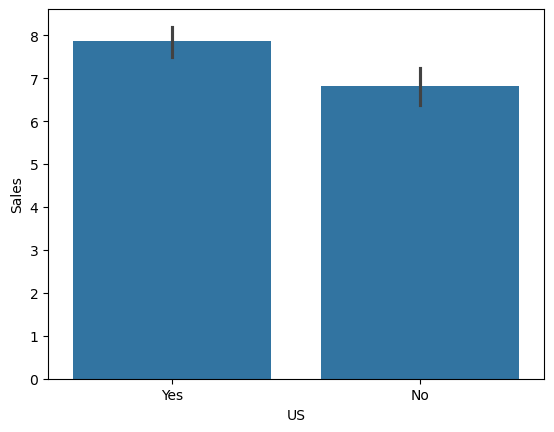

In [231]:
var = 'US'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [233]:
d_y = data.loc[data[var]=='Yes', target]
d_n = data.loc[data[var]=='No', target]

spst.ttest_ind(d_y, d_n)

TtestResult(statistic=3.589738747802499, pvalue=0.00037233958701471517, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

미국 내 매장이 미국 외 매장보다 판매량이 높다 = 관계가 있다. 

## **4.관계 정리하기**

① 강한관계

In [238]:
# shelveLoc, Price_diff

② 중간관계

In [240]:
# Price, Urban, US, Advertising

③ 관계없음

In [242]:
# Pop, Age, Income